In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [13]:
Data =pd.read_csv("Mall_Customers.csv")
.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [15]:
Data.shape

(200, 5)

In [19]:
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Age'>

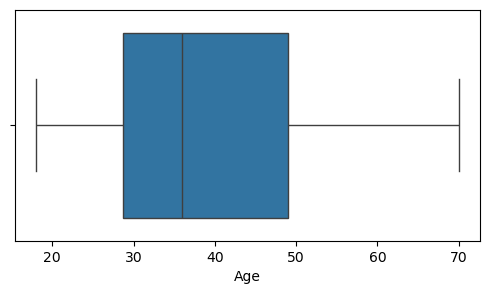

In [23]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Age'])

In [25]:
print("Cantidad de Registros con cero en Annual Income (k$): ",Data['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100): ",Data['Spending Score (1-100)'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",Data['Age'].isin([0]).sum())

Cantidad de Registros con cero en Annual Income (k$):  0
Cantidad de Registros con cero en Spending Score (1-100):  0
Cantidad de Registros con cero en Age:  0


<Axes: xlabel='Spending Score (1-100)'>

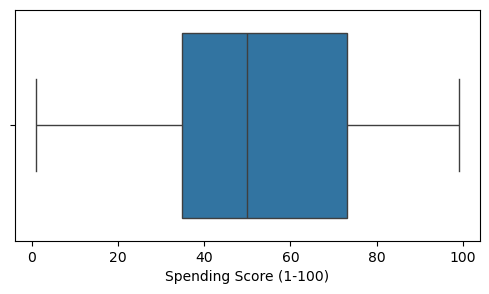

In [27]:
Data['Annual Income (k$)']=Data['Spending Score (1-100)'].replace(0,Data['Age'].mean())

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Spending Score (1-100)'])

In [31]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Data['Spending Score (1-100)']<nivel_minimo)|(Data['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [33]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
Data = Data[["Age","Spending Score (1-100)","Annual Income (k$)"]]
Data.head(10)

,Age,Spending Score (1-100),Annual Income (k$)
0,19,39,39
1,21,81,81
2,20,6,6
3,23,77,77
4,31,40,40
5,22,76,76
6,35,6,6
7,23,94,94
8,64,3,3
9,30,72,72


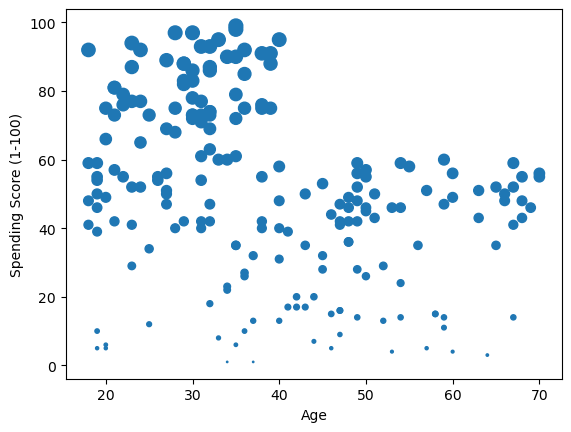

In [45]:
plt.scatter(Data['Age'], Data['Annual Income (k$)'], Data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Text(0.5, 0, 'Número de Clusters')

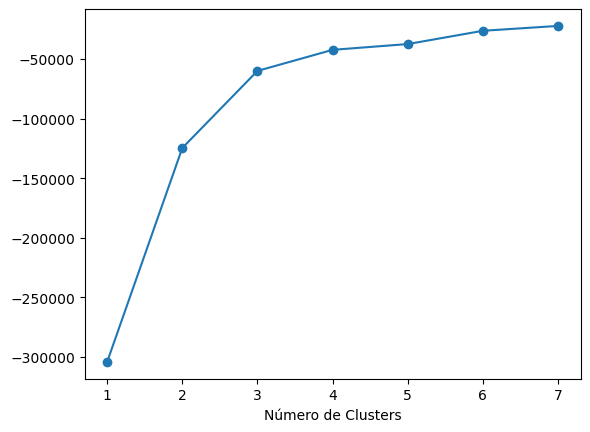

In [41]:
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Data).score(Data) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')

In [49]:
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Data)

KMeans(n_clusters=5, random_state=0)

In [53]:
Modelo.labels_
Data["Grupo"] = Modelo.labels_ 
print (Data)

     Age  Spending Score (1-100)  Annual Income (k$)  Grupo
0     19                      39                  39      2
1     21                      81                  81      1
2     20                       6                   6      3
3     23                      77                  77      1
4     31                      40                  40      2
..   ...                     ...                 ...    ...
195   35                      79                  79      1
196   45                      28                  28      3
197   32                      74                  74      1
198   32                      18                  18      3
199   30                      83                  83      1

[200 rows x 4 columns]


In [63]:
Observaciones = len(Data)
X = Data.drop('Grupo', axis=1)
clusters = Data['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)


# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],

]
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))


+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Numero de Observaciones |         200         |
| Coeficiente Silhouette  | 0.42663351093594315 |
+-------------------------+---------------------+


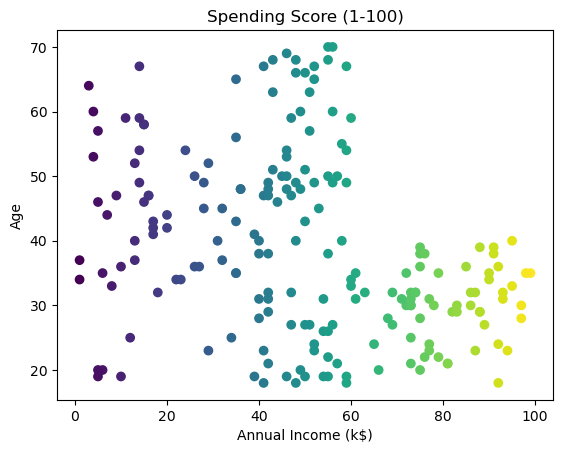

In [168]:
plt.scatter(Data['Annual Income (k$)'], Data['Age'], c=Data['Spending Score (1-100)'], )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('Spending Score (1-100)')
plt.show()

In [102]:
Observaciones = len(Data)
X = Data.drop('Grupo', axis=1)
clusters = Data['Grupo']

calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_Data = [ 
    ["Indice Calinski Harabasz", calinski_score],    
    ["Indice Davies Bouldin", davies_score]
]
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Numero de Observaciones |         200         |
| Coeficiente Silhouette  | 0.42663351093594315 |
+-------------------------+---------------------+


In [199]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(Data)  

y_kmeans = kmeans.predict(Data)


calinski_score = calinski_harabasz_score(Data, y_kmeans)
print("Calinski-Harabasz Index: ", calinski_score)

Calinski-Harabasz Index:  388.46226527589357


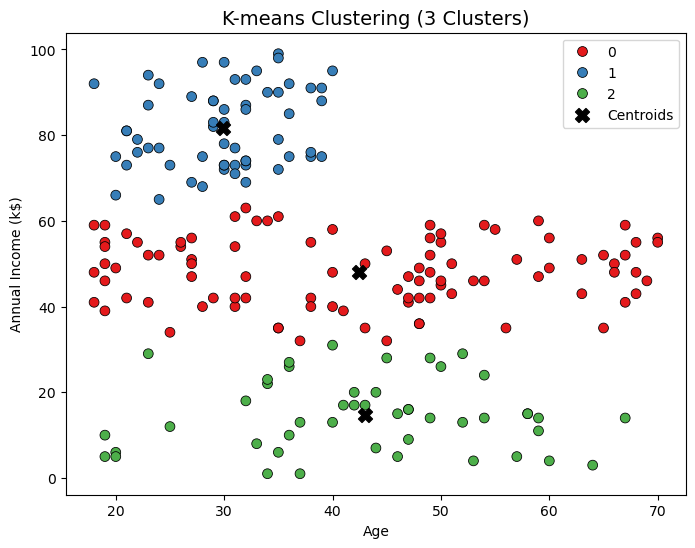

In [182]:

centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

sns.scatterplot(x=Data['Age'], y=Data['Annual Income (k$)'], hue=y_kmeans, palette='Set1', s=50, edgecolor='k', alpha=1)

plt.scatter(centroids[:, 0], centroids[:, 1], c='Black', s=100, marker='X', label='Centroids')

plt.title('K-means Clustering (3 Clusters)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()

plt.show()